In [1]:
from scqbf.scqbf_instance import *
from scqbf.scqbf_solution import *
from scqbf.scqbf_evaluator import *
from scqbf.scqbf_ga import *

In [2]:
instance = read_max_sc_qbf_instance("instances/gen1/instance2.txt")
instance

ScQbfInstance(n=200, subsets=[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,

In [3]:
ga = ScQbfGA(instance, population_size=100, mutation_rate_multiplier=2, ga_strategy=GAStrategy(mutation_strategy="adaptive"), debug_options={
    'verbose': True,
    'save_history': True,
    'save_mrate_history': True
}, termination_options={
    'max_iter': 1000,
}
)
ga.solve()

Iteration 1: Best fitness = N/A
Iteration 2: Best fitness = 489.1300000000001
Iteration 3: Best fitness = 869.7699999999995
Iteration 4: Best fitness = 869.7699999999995
Iteration 5: Best fitness = 906.8599999999996
Adaptive mutation rate multiplier adjusted to: 1.75
Iteration 6: Best fitness = 912.2799999999994
Iteration 7: Best fitness = 1069.8500000000006
Iteration 8: Best fitness = 1137.9700000000023
Iteration 9: Best fitness = 1153.2400000000016
Iteration 10: Best fitness = 1309.7900000000022
Adaptive mutation rate multiplier adjusted to: 1.5
Iteration 11: Best fitness = 1319.760000000006
Iteration 12: Best fitness = 1416.2000000000037
Iteration 13: Best fitness = 1416.2000000000037
Iteration 14: Best fitness = 1603.6000000000079
Iteration 15: Best fitness = 1603.6000000000079
Adaptive mutation rate multiplier adjusted to: 1.25
Iteration 16: Best fitness = 1696.1200000000038
Iteration 17: Best fitness = 1756.56000000001
Iteration 18: Best fitness = 1992.960000000006
Iteration 19: 

ScQbfSolution(elements=[0, 1, 5, 7, 10, 11, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 62, 63, 64, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 100, 101, 102, 104, 106, 107, 109, 110, 111, 113, 116, 119, 121, 122, 124, 126, 127, 130, 131, 132, 133, 134, 137, 139, 141, 142, 143, 144, 145, 146, 152, 154, 156, 159, 161, 162, 163, 170, 171, 172, 177, 178, 179, 180, 183, 185, 187, 190, 191, 193, 194, 195, 196, 197, 198, 199], _objfun_val=None)

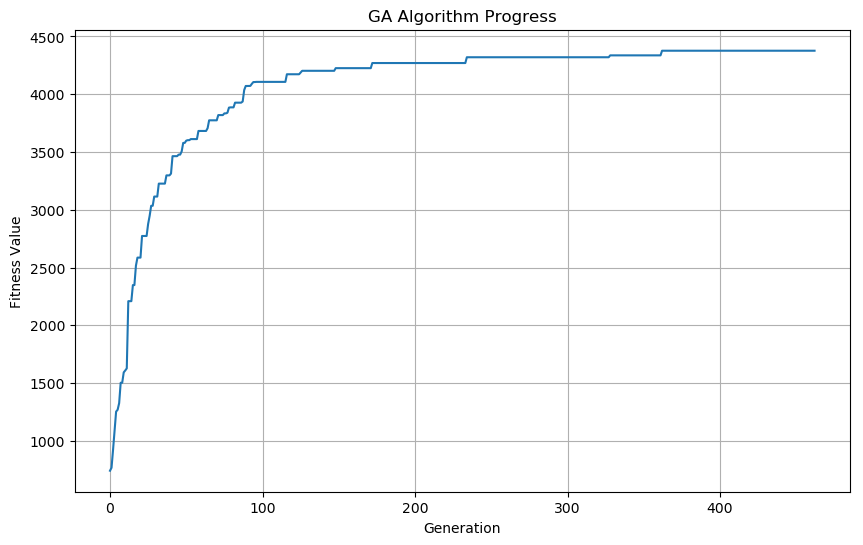

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ga.history[1:])
plt.title('GA Algorithm Progress')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.grid(True)
plt.show()

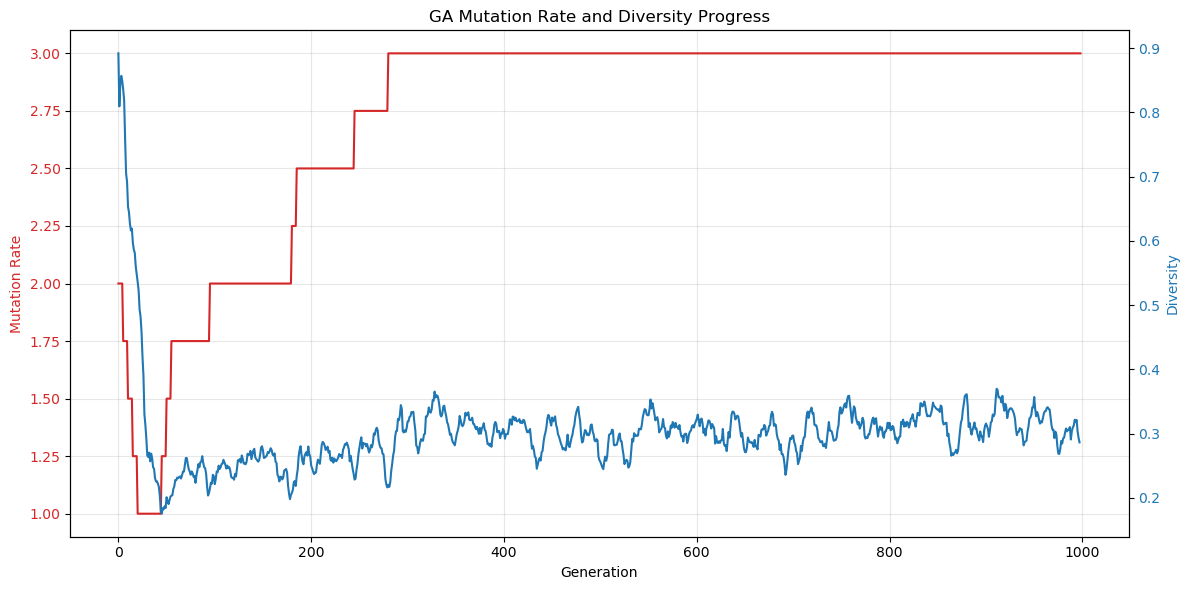

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mutation rate on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mutation Rate', color=color)
ax1.plot(ga.mutation_rate_history, color=color, label='Mutation Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create a second y-axis for diversity
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Diversity', color=color)
ax2.plot(ga.diversity_history[1:], color=color, label='Diversity')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GA Mutation Rate and Diversity Progress')
fig.tight_layout()
plt.show()

In [5]:
import random

def test_latin_hypercube_initialization(population_size, n):
    """
    Standalone function to test Latin Hypercube Sampling initialization.
    
    Args:
        population_size: Size of the population (must be even for binary alleles)
        n: Number of genes (chromosome length)
    
    Returns:
        population: List of chromosomes
    """
    if population_size % 2 != 0:
        raise ValueError("Population size must be a multiple of the allele count (here, 2) for Latin Hypercube Sampling.")
    
    population = []
    
    # Initialize empty chromosomes
    for i in range(population_size):
        chromosome = [0] * n
        population.append(chromosome)
    
    # For each gene position (column), create a random permutation
    for gene_pos in range(n):
        # Create permutation of population indices [0, 1, 2, ..., population_size-1]
        permutation = list(range(population_size))
        random.shuffle(permutation)
        
        # Assign alleles based on permutation index modulo 2
        for pop_idx in range(population_size):
            allele = permutation[pop_idx] % 2
            population[pop_idx][gene_pos] = allele
    
    return population

# Test the function
def analyze_population(population):
    """Analyze the population to verify Latin Hypercube properties."""
    population_size = len(population)
    n = len(population[0]) if population else 0
    
    print(f"Population size: {population_size}")
    print(f"Chromosome length: {n}")
    print("\nFirst 5 chromosomes:")
    for i, chrom in enumerate(population[:5]):
        print(f"Individual {i}: {chrom}")
    
    print(f"\nAllele distribution per gene position:")
    for gene_pos in range(min(10, n)):  # Show first 10 genes
        zeros = sum(1 for chrom in population if chrom[gene_pos] == 0)
        ones = sum(1 for chrom in population if chrom[gene_pos] == 1)
        print(f"Gene {gene_pos}: 0s={zeros}, 1s={ones}")
    
    # Check if all gene positions have exactly population_size/2 of each allele
    balanced = True
    for gene_pos in range(n):
        zeros = sum(1 for chrom in population if chrom[gene_pos] == 0)
        ones = sum(1 for chrom in population if chrom[gene_pos] == 1)
        if zeros != population_size // 2 or ones != population_size // 2:
            balanced = False
            break
    
    print(f"\nPerfectly balanced alleles across all genes: {balanced}")
    
    return population

# Test with different parameters
print("=== Test 1: Small population ===")
pop1 = test_latin_hypercube_initialization(6, 8)
analyze_population(pop1)

print("\n=== Test 2: Larger population ===")
pop2 = test_latin_hypercube_initialization(20, 10)
analyze_population(pop2)

# Compare with random initialization
def random_initialization(population_size, n):
    """Random initialization for comparison."""
    population = []
    for _ in range(population_size):
        chromosome = [random.randint(0, 1) for _ in range(n)]
        population.append(chromosome)
    return population

print("\n=== Comparison: Random vs Latin Hypercube ===")
print("Random initialization:")
random_pop = random_initialization(20, 10)
analyze_population(random_pop)

print("\nLatin Hypercube initialization:")
lh_pop = test_latin_hypercube_initialization(20, 10)
analyze_population(lh_pop)

=== Test 1: Small population ===
Population size: 6
Chromosome length: 8

First 5 chromosomes:
Individual 0: [0, 0, 1, 0, 1, 1, 1, 1]
Individual 1: [1, 0, 0, 0, 0, 1, 0, 1]
Individual 2: [1, 1, 0, 1, 1, 0, 1, 0]
Individual 3: [0, 1, 0, 0, 0, 0, 0, 0]
Individual 4: [1, 0, 1, 1, 1, 0, 1, 1]

Allele distribution per gene position:
Gene 0: 0s=3, 1s=3
Gene 1: 0s=3, 1s=3
Gene 2: 0s=3, 1s=3
Gene 3: 0s=3, 1s=3
Gene 4: 0s=3, 1s=3
Gene 5: 0s=3, 1s=3
Gene 6: 0s=3, 1s=3
Gene 7: 0s=3, 1s=3

Perfectly balanced alleles across all genes: True

=== Test 2: Larger population ===
Population size: 20
Chromosome length: 10

First 5 chromosomes:
Individual 0: [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
Individual 1: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Individual 2: [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Individual 3: [1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
Individual 4: [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]

Allele distribution per gene position:
Gene 0: 0s=10, 1s=10
Gene 1: 0s=10, 1s=10
Gene 2: 0s=10, 1s=10
Gene 3: 0s=10, 1s=10
Gene 4: 0s=10, 1s=1

[[1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
 [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
 [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 0, 1, 1, 0]]